In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\PID\PID_C_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,NaN,33.0
...,...,...,...,...,...,...,...,...
763,NaN,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,NaN,NaN
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,NaN,60.0,0.0,0.0,30.1,0.349,47.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	69
float64		column 2	65
float64		column 3	85
float64		column 4	73
float64		column 5	84
float64		column 6	86
float64		column 7	79
float64		column 8	73


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,699.000000,703.000000,683.000000,695.000000,684.000000,682.000000,689.000000,695.000000
mean,3.799714,121.066856,68.875549,20.306475,82.475146,31.946628,0.473187,33.287770
std,3.368904,32.171634,19.059885,15.977277,118.801621,7.962622,0.322910,11.658224
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.247000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,37.500000,32.000000,0.378000,29.000000
75%,6.000000,141.500000,80.000000,32.000000,130.000000,36.475000,0.629000,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,70.000000


<AxesSubplot:>

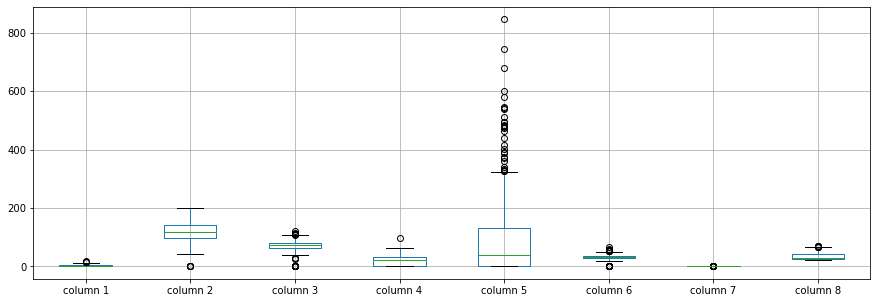

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      3.799714
column 2    121.066856
column 3     68.875549
column 4     20.306475
column 5     82.475146
column 6     31.946628
column 7      0.473187
column 8     33.287770
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.142318,0.129394,-0.092573,-0.075348,0.013726,-0.046046,0.553727
column 2,0.142318,1.000000,0.151430,0.066956,0.322056,0.244305,0.161560,0.276245
column 3,0.129394,0.151430,1.000000,0.210044,0.093667,0.311771,0.061560,0.284768
column 4,-0.092573,0.066956,0.210044,1.000000,0.443882,0.412882,0.174465,-0.106656
column 5,-0.075348,0.322056,0.093667,0.443882,1.000000,0.228666,0.189837,-0.052676
column 6,0.013726,0.244305,0.311771,0.412882,0.228666,1.000000,0.147217,0.033261
column 7,-0.046046,0.161560,0.061560,0.174465,0.189837,0.147217,1.000000,0.038542
column 8,0.553727,0.276245,0.284768,-0.106656,-0.052676,0.033261,0.038542,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+65,8+65+65,8+65+65+65,8+65+65+65+65,8+65+65+65+65+65,8+65+65+65+65,8+65+65+65,8+65+65,8+65,8], vae_layer = False, seed = 65)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 388.31214332580566
Epoch: 1 , loss: 388.4936218261719
Epoch: 2 , loss: 388.41590690612793
Epoch: 3 , loss: 377.6299508412679
Epoch: 4 , loss: 348.7189426422119
Epoch: 5 , loss: 338.9065570831299
Epoch: 6 , loss: 331.0273628234863
Epoch: 7 , loss: 330.515518506368
Epoch: 8 , loss: 325.312447865804
Epoch: 9 , loss: 315.6324993769328
Epoch: 10 , loss: 311.40981070200604
Epoch: 11 , loss: 304.33697096506756
Epoch: 12 , loss: 300.80790996551514
Epoch: 13 , loss: 296.0246871312459
Epoch: 14 , loss: 283.73285579681396
Epoch: 15 , loss: 282.0713885625203
Epoch: 16 , loss: 274.0457344055176
Epoch: 17 , loss: 274.78255875905353
Epoch: 18 , loss: 265.7463095982869
Epoch: 19 , loss: 273.48585573832196
Epoch: 20 , loss: 261.57534344991046
Epoch: 21 , loss: 258.79873212178546
Epoch: 22 , loss: 256.798467318217
Epoch: 23 , loss: 254.78851381937662
Epoch: 24 , loss: 253.14256477355957
Epoch: 25 , loss: 251.032024065653

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(768, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     8.000000
column 2    99.000000
column 3    41.728027
column 4     0.000000
column 5     0.000000
column 6    35.400000
column 7     0.388000
column 8    50.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\PID.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
2,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
3,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
4,0.000000,0.000000,0.0,0.000000,0.0,0.0,-2.134101,0.000000
...,...,...,...,...,...,...,...,...
763,-7.364263,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
764,0.000000,0.000000,0.0,0.000000,0.0,0.0,-0.263424,-18.892971
765,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
766,0.000000,-32.987816,0.0,0.000000,0.0,0.0,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1105.8343728391226, 5776.576248839705)

In [17]:
NRMS=numerator/denominator
NRMS


0.19143422075684413

In [18]:
new_df.iloc[66,:]

column 1      0.000
column 2    109.000
column 3     88.000
column 4     30.000
column 5      0.000
column 6     32.500
column 7      0.855
column 8     38.000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.000000,148.000000,72.0,35.000000,0.0,33.6,0.627000,50.000000
1,1.000000,85.000000,66.0,29.000000,0.0,26.6,0.351000,31.000000
2,8.000000,183.000000,64.0,0.000000,0.0,23.3,0.672000,32.000000
3,1.000000,89.000000,66.0,23.000000,94.0,28.1,0.167000,21.000000
4,0.000000,137.000000,40.0,35.000000,168.0,43.1,0.153899,33.000000
...,...,...,...,...,...,...,...,...
763,2.635737,101.000000,76.0,48.000000,180.0,32.9,0.171000,63.000000
764,2.000000,122.000000,70.0,27.000000,0.0,36.8,0.076576,8.107029
765,5.000000,121.000000,72.0,23.000000,112.0,26.2,0.245000,30.000000
766,1.000000,93.012184,60.0,0.000000,0.0,30.1,0.349000,47.000000


In [21]:
imputations[-1].to_excel("PID_C_10.xlsx", index=False, header=False)